<a href="https://colab.research.google.com/github/springsnowdrop/202206_technical_assignment_dsde/blob/master/geodata_airquality_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geopandas
!pip install georasters
!pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 55.7 MB/s 
     |████████████████████████████████| 16.7 MB 318 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 41 kB 700 kB/s 
     |████████████████████████████████| 60 kB 7.2 MB/s 
     |████████████████████████████████| 5.7 MB 31.2 MB/s 
     |████████████████████████████████| 209 kB 68.6 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 2.4 MB 46.7 MB/s 
     |████████████████████████████████| 147 kB 57.2 MB/s 
     |████████████████████████████████| 95 kB 4.7 MB/s 
     |████████████████████████████████| 243 kB 42.3 MB/s 
     |████████████████████████████████| 46 kB 4.9 MB/s 
   

In [ ]:
#import libraries and packages
import requests
import json

import georasters as gr
import pandas as pd
import geopandas as gpd
import numpy as np 

import rasterio
from rasterio.plot import show


In [4]:
#identify the stations and write json file from the url into dictionary.

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36'}
page = requests.get("https://api.energyandcleanair.org/stations?country=GB", headers=headers)
print(page.text)
data = page.text

{"data": [{"gadm1_id": "gbr.1_1", "infos": null, "name": "station_gb0004r", "level": "station", "show_in_dashboard": false, "attribution": null, "coordinates": {"longitude": 0.5061470000000001, "latitude": 52.55985399948203}, "type": "background", "last_updated": "2021-10-26T15:53:01.414892+00:00", "city_id": "norfolk_gbr.1_1_gb", "pollutants": null, "source": "eea", "id": "station_gb0004r", "country_id": "GB", "gadm2_id": "gbr.1.16_1", "last_scraped_data": null, "names": ["station_gb0004r"], "timezone": "Europe/London", "first_updated": null, "gpw": null}, {"gadm1_id": "gbr.1_1", "infos": null, "name": "station_gb0017r", "level": "station", "show_in_dashboard": false, "attribution": null, "coordinates": {"longitude": 1.614805, "latitude": 52.72714999948286}, "type": "background", "last_updated": "2021-10-26T15:53:01.414909+00:00", "city_id": "norfolk_gbr.1_1_gb", "pollutants": null, "source": "eea", "id": "station_gb0017r", "country_id": "GB", "gadm2_id": "gbr.1.59_1", "last_scraped_d

In [5]:
#load json file

data1 = json.loads(data)
print(type(data1))
data1.keys()
temp = 'data'
data2 = data1[temp]
print(data1[temp])

#extract values from dictionary to a list
my_list = []
for i in data1.values():
    my_list.append(i)

my_list

<class 'dict'>
[{'gadm1_id': 'gbr.1_1', 'infos': None, 'name': 'station_gb0004r', 'level': 'station', 'show_in_dashboard': False, 'attribution': None, 'coordinates': {'longitude': 0.5061470000000001, 'latitude': 52.55985399948203}, 'type': 'background', 'last_updated': '2021-10-26T15:53:01.414892+00:00', 'city_id': 'norfolk_gbr.1_1_gb', 'pollutants': None, 'source': 'eea', 'id': 'station_gb0004r', 'country_id': 'GB', 'gadm2_id': 'gbr.1.16_1', 'last_scraped_data': None, 'names': ['station_gb0004r'], 'timezone': 'Europe/London', 'first_updated': None, 'gpw': None}, {'gadm1_id': 'gbr.1_1', 'infos': None, 'name': 'station_gb0017r', 'level': 'station', 'show_in_dashboard': False, 'attribution': None, 'coordinates': {'longitude': 1.614805, 'latitude': 52.72714999948286}, 'type': 'background', 'last_updated': '2021-10-26T15:53:01.414909+00:00', 'city_id': 'norfolk_gbr.1_1_gb', 'pollutants': None, 'source': 'eea', 'id': 'station_gb0017r', 'country_id': 'GB', 'gadm2_id': 'gbr.1.59_1', 'last_scr

[[{'attribution': None,
   'city_id': 'norfolk_gbr.1_1_gb',
   'coordinates': {'latitude': 52.55985399948203,
    'longitude': 0.5061470000000001},
   'country_id': 'GB',
   'first_updated': None,
   'gadm1_id': 'gbr.1_1',
   'gadm2_id': 'gbr.1.16_1',
   'gpw': None,
   'id': 'station_gb0004r',
   'infos': None,
   'last_scraped_data': None,
   'last_updated': '2021-10-26T15:53:01.414892+00:00',
   'level': 'station',
   'name': 'station_gb0004r',
   'names': ['station_gb0004r'],
   'pollutants': None,
   'show_in_dashboard': False,
   'source': 'eea',
   'timezone': 'Europe/London',
   'type': 'background'},
  {'attribution': None,
   'city_id': 'norfolk_gbr.1_1_gb',
   'coordinates': {'latitude': 52.72714999948286, 'longitude': 1.614805},
   'country_id': 'GB',
   'first_updated': None,
   'gadm1_id': 'gbr.1_1',
   'gadm2_id': 'gbr.1.59_1',
   'gpw': None,
   'id': 'station_gb0017r',
   'infos': None,
   'last_scraped_data': None,
   'last_updated': '2021-10-26T15:53:01.414909+00:00'

In [6]:
# create data frame from json file

my_list1 = [i for i in data1.values()]
my_list1

a = [i['city_id'] for i in data1['data']]
b = [i['coordinates'] for i in data1['data']]
c = [i['name'] for i in data1['data']]
df=pd.DataFrame(columns=['city_id','coordinates','name'])
df['city_id'],df['coordinates'],df['name']=a,b,c

lat = [i['latitude'] for i in b]
long = [i['longitude'] for i in b]
coordinates=pd.DataFrame(columns=['city_id','station','lat','long'])
coordinates['city_id'],coordinates['station'],coordinates['lat'],coordinates['long']=a,c,lat,long
coordinates


,city_id,station,lat,long
0,norfolk_gbr.1_1_gb,station_gb0004r,52.559854,0.506147
1,norfolk_gbr.1_1_gb,station_gb0017r,52.727150,1.614805
2,banchory_gbr.3_1_gb,station_gb0091r,57.076625,-2.534892
3,cardiff_gbr.4_1_gb,station_gb0146a,51.489078,-3.164169
4,cardiff_gbr.4_1_gb,station_gb0369a,51.488197,-3.228471
...,...,...,...,...
420,east cambridgeshire_gbr.1_1_gb,Wicken Fen,52.298500,0.290917
421,wigan_gbr.1_1_gb,Wigan Centre,53.549140,-2.638139
422,wrexham_gbr.4_1_gb,Wrexham,53.042220,-3.002778
423,halton_gbr.1_1_gb,Widnes Milton Road,53.365391,-2.731680


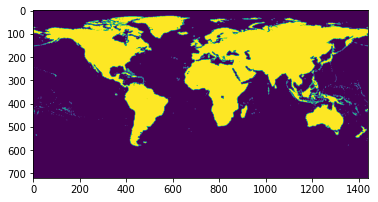

In [9]:
#download the image from github and upload it to colab

fp = r'/content/gpw_v4_population_density_rev11_2020_15_min.tif'
img = rasterio.open(fp)
show(img.read(1))


In [ ]:
img.count, img.height, img.width

(1, 720, 1440)

In [ ]:
img.crs

CRS.from_epsg(4326)

In [ ]:
type(img)

rasterio.io.DatasetReader

In [40]:
band1 = img.read(1)
band1
type(band1)
band1.dtype

array([[-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       ...,
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38]], dtype=float32)

In [ ]:
#show the basic stats of the band

array = img.read()
stats =[]
for band in array:
       stats.append({
           'min': band.min(),
           'mean': band.mean(),
           'median': np.median(band),
           'max': band.max()})

print(stats)

[{'min': -3.402823e+38, 'mean': -inf, 'median': -inf, 'max': 29819.701}]


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [20]:
#dfLocations = pd.DataFrame(columns = ['long', 'lat'], data = coordinates)
dfLocations = pd.DataFrame(coordinates)
gdfLocations = gpd.GeoDataFrame(dfLocations, geometry=gpd.points_from_xy(dfLocations.long, dfLocations.lat), crs = {'init':'epsg:4326'})

# Now reproject to a crs using meters
#gdfLocations = gdfLocations.to_crs({'init':'epsg:32630'})
gdfLocations = gdfLocations.to_crs({'init':'epsg:27700'})
# Buffer and join
gdfLocations['geometry'] = gdfLocations['geometry'].buffer(5000)

gdfLocations

#gdfLocations['geometry_5k'] = gdfLocations['geometry_5k'].buffer(5000)
#gdfLocations['geometry_10k'] = gdfLocations['geometry_10k'].buffer(10000)
#gdfLocations['geometry_50k'] = gdfLocations['geometry_50k'].buffer(50000)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,city_id,station,lat,long,geometry
0,norfolk_gbr.1_1_gb,station_gb0004r,52.559854,0.506147,"POLYGON ((574981.805 298730.025, 574957.729 29..."
1,norfolk_gbr.1_1_gb,station_gb0017r,52.727150,1.614805,"POLYGON ((649178.703 320519.198, 649154.627 32..."
2,banchory_gbr.3_1_gb,station_gb0091r,57.076625,-2.534892,"POLYGON ((372671.419 798527.715, 372647.342 79..."
3,cardiff_gbr.4_1_gb,station_gb0146a,51.489078,-3.164169,"POLYGON ((324268.021 177323.963, 324243.945 17..."
4,cardiff_gbr.4_1_gb,station_gb0369a,51.488197,-3.228471,"POLYGON ((319802.019 177298.952, 319777.943 17..."
...,...,...,...,...,...
420,east cambridgeshire_gbr.1_1_gb,Wicken Fen,52.298500,0.290917,"POLYGON ((561315.588 269179.351, 561291.512 26..."
421,wigan_gbr.1_1_gb,Wigan Centre,53.549140,-2.638139,"POLYGON ((362816.065 406023.564, 362791.988 40..."
422,wrexham_gbr.4_1_gb,Wrexham,53.042220,-3.002778,"POLYGON ((337865.076 349909.251, 337841.000 34..."
423,halton_gbr.1_1_gb,Widnes Milton Road,53.365391,-2.731680,"POLYGON ((356408.560 385640.922, 356384.484 38..."


In [75]:
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import os
import matplotlib.pyplot as plt



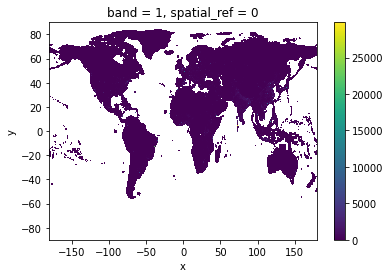

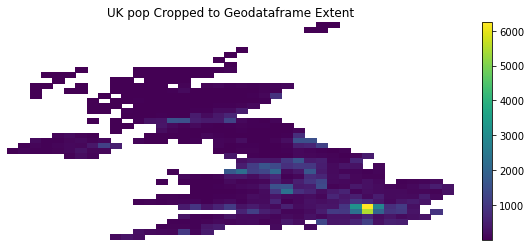

In [62]:
#download the UK administrative boundary from GADM website and upload to google colab.

pop = rioxarray.open_rasterio("/content/gpw_v4_population_density_rev11_2020_15_min.tif", masked=True)
pop.plot()

#crop the population map to Uk boundry
UK = gpd.read_file("/content/gadm36_GBR_0.shp")
UK.crs

pop_UK = pop.rio.clip(UK.geometry.apply(mapping))

f1, ax1 = plt.subplots(figsize=(10, 4))
pop_UK.plot(ax=ax1)
ax1.set(title="UK pop Cropped to Geodataframe Extent")
ax1.set_axis_off()
plt.show()


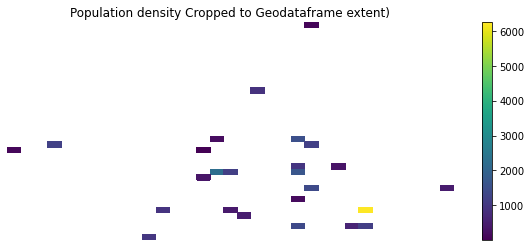

In [63]:
#crop the population map to 2km radius of buffer zone 
pop_clipped = pop.rio.clip(gdfLocations.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      gdfLocations.crs)

f, ax = plt.subplots(figsize=(10, 4))
pop_clipped.plot(ax=ax)
ax.set(title="Population density Cropped to Geodataframe extent)")
ax.set_axis_off()
plt.show()

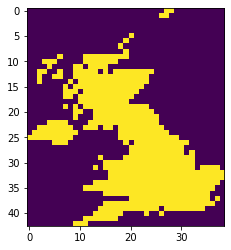

148585


In [79]:
#calculating the total population
pop_UK.rio.to_raster('/content/pop_UK.tif')
pop_UK_total = r'/content/pop_UK.tif'

pop_UK_total = rasterio.open(pop_UK_total)
show(pop_UK_total.read(1))

pop_UK_total = pop_UK_total.read(1)
pop_UK_total[pop_UK_total<0] = None
UK_pop_s1 = pop_UK_total[pop_UK_total>0]
UK_pop_sum = UK_pop_s1[UK_pop_s1>0].sum()
print(round(UK_pop_sum))